In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive'
/content/drive/MyDrive


In [ ]:
# Loading in and displaying data
movies = pd.read_csv('/content/tmdb_5000_movies.csv')
movies


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [ ]:
print(movies.info())
movies.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

(4803, 20)

## **Data Preprocessing and Cleaning**

In [ ]:
# Preprocessing Data
# Only using specific columns
movies = movies[['budget', 'genres', 'id', 'keywords','original_language', 'original_title',
                 'popularity', 'production_companies', 'production_countries',
                 'release_date', 'revenue', 'runtime', 'vote_average', 'vote_count']]
movies = movies.dropna()

In [ ]:
# Handling missing values
print((movies == 0).sum()* 100 / len(movies))
print((movies == 0).sum())



budget                  21.583333
genres                   0.000000
id                       0.000000
keywords                 0.000000
original_language        0.000000
original_title           0.000000
popularity               0.000000
production_companies     0.000000
production_countries     0.000000
release_date             0.000000
revenue                 29.666667
runtime                  0.708333
vote_average             1.270833
vote_count               1.250000
dtype: float64
budget                  1036
genres                     0
id                         0
keywords                   0
original_language          0
original_title             0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                 1424
runtime                   34
vote_average              61
vote_count                60
dtype: int64


In [ ]:
# Handling missing values in budget and revenue column

'''So as we can see there are 1036 rows with budget= 0 but it comprises 21% of the budget column.
Also the revenue column has 1424 rows with revenue = 0 which also comprises 30% of the revenue column.
Removing all those rows will lead to data loss. Instead we can remove rows with both budget and revenue = 0'''

movies = movies[~((movies['budget'] == 0) & (movies['revenue'] == 0))]


In [ ]:
# There are still some enteries with null values and also some enteries with single or double digit values for budget and revenue which is not practically possible

movies= movies[~((movies['budget']< 1000) & (movies['revenue']< 1000))]


In [ ]:
print((movies == 0).sum()* 100 / len(movies))
print((movies == 0).sum())

# Now we can see that the null values have drastically reduce


budget                   3.611971
genres                   0.000000
id                       0.000000
keywords                 0.000000
original_language        0.000000
original_title           0.000000
popularity               0.000000
production_companies     0.000000
production_countries     0.000000
release_date             0.000000
revenue                 13.338493
runtime                  0.077399
vote_average             0.180599
vote_count               0.180599
dtype: float64
budget                  140
genres                    0
id                        0
keywords                  0
original_language         0
original_title            0
popularity                0
production_companies      0
production_countries      0
release_date              0
revenue                 517
runtime                   3
vote_average              7
vote_count                7
dtype: int64


In [ ]:
# As we can see the revenue column still has 13% of missing values which is a huge weight but
#we cannot calculate it because each movie has its own revenue and cannot be calculated by averaging similar movies. So removing all those values

movies= movies[~(movies['revenue']== 0)]

In [ ]:
movies['genres']

,genres
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
...,...
4775,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name..."
4788,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam..."
4792,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name..."
4796,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""..."


In [ ]:
import ast

json_cols = ['genres', 'keywords', 'production_companies', 'production_countries']
for col in json_cols:
    movies[col] = movies[col].apply(ast.literal_eval)




In [ ]:
# Main genre and genre count
movies['main_genre'] = movies['genres'].apply(
    lambda x: x[0]['name'] if isinstance(x, list) and len(x) > 0 else 'Unknown'
)
movies['n_genres'] = movies['genres'].apply(
    lambda x: len(x) if isinstance(x, list) else 0
)


In [ ]:
# Keyword count
movies['n_keywords'] = movies['keywords'].apply(
    lambda x: len(x) if isinstance(x, list) else 0
)

In [ ]:
# Changing original language column into numerical value
lang_id = list(range(1, movies['original_language'].nunique() + 1))
lang_og = movies['original_language'].unique()
lang_dic = dict(zip(lang_og, lang_id))

# Function to convert languages into ints
def lang_to_nums(row_entry):
  return(lang_dic[row_entry.original_language])

movies['original_language'] = movies.apply(lang_to_nums, axis = 1)
movies.head()

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,main_genre,n_genres,n_keywords
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",1,Avatar,150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,7.2,11800,Action,4,21
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",1,Pirates of the Caribbean: At World's End,139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,6.9,4500,Adventure,3,16
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",1,Spectre,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,6.3,4466,Action,3,7
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",1,The Dark Knight Rises,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,7.6,9106,Action,4,21
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",1,John Carter,43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,6.1,2124,Action,3,16


In [ ]:
# Main production country and company count
movies['main_country'] = movies['production_countries'].apply(
    lambda x: x[0]['name'] if isinstance(x, list) and len(x) > 0 else 'Unknown'
)
movies['n_companies'] = movies['production_companies'].apply(
    lambda x: len(x) if isinstance(x, list) else 0
)


In [ ]:
# Handling release date column
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')


In [ ]:
# Fill runtime if any missing after previous cleaning
movies['runtime'] = movies['runtime'].fillna(movies['runtime'].median())

# Extract release_year from release_date
movies['release_year'] = movies['release_date'].dt.year

# If any release_year is NaN (bad dates), drop those few rows
movies = movies.dropna(subset=['release_year'])

movies.head()

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,main_genre,n_genres,n_keywords,main_country,n_companies,release_year
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",1,Avatar,150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,7.2,11800,Action,4,21,United States of America,4,2009
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",1,Pirates of the Caribbean: At World's End,139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,6.9,4500,Adventure,3,16,United States of America,3,2007
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",1,Spectre,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,6.3,4466,Action,3,7,United Kingdom,3,2015
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",1,The Dark Knight Rises,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,7.6,9106,Action,4,21,United States of America,4,2012
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",1,John Carter,43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,6.1,2124,Action,3,16,United States of America,1,2012


In [ ]:
# Function to extract the ID of the first item in a list of dictionaries, or 0 if the list is empty or malformed
def extract_first_id(list_of_dicts):
  if isinstance(list_of_dicts, list) and len(list_of_dicts) > 0 and isinstance(list_of_dicts[0], dict) and 'id' in list_of_dicts[0]:
    return list_of_dicts[0]['id']
  return 0

# Function to count the number of items in a list of dictionaries
def count_items(list_of_dicts):
  if isinstance(list_of_dicts, list):
    return len(list_of_dicts)
  return 0

In [ ]:
# Converting string and date cols
movies['genres'] = movies['genres'].apply(extract_first_id)
movies['keywords'] = movies['keywords'].apply(extract_first_id)
movies['production_companies'] = movies['production_companies'].apply(extract_first_id)
movies['production_countries'] = movies['production_countries'].apply(count_items)
movies['release_date'] = movies['release_date'].dt.strftime('%Y%m%d')
movies.head()

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,main_genre,n_genres,n_keywords,main_country,n_companies,release_year
0,237000000,28,19995,1463,1,Avatar,150.437577,289,2,20091210,2787965087,162.0,7.2,11800,Action,4,21,United States of America,4,2009
1,300000000,12,285,270,1,Pirates of the Caribbean: At World's End,139.082615,2,1,20070519,961000000,169.0,6.9,4500,Adventure,3,16,United States of America,3,2007
2,245000000,28,206647,470,1,Spectre,107.376788,5,2,20151026,880674609,148.0,6.3,4466,Action,3,7,United Kingdom,3,2015
3,250000000,28,49026,849,1,The Dark Knight Rises,112.312950,923,1,20120716,1084939099,165.0,7.6,9106,Action,4,21,United States of America,4,2012
4,260000000,28,49529,818,1,John Carter,43.926995,2,1,20120307,284139100,132.0,6.1,2124,Action,3,16,United States of America,1,2012


In [ ]:
# Changing main_country column into numerical value
country_id = list(range(1, movies['main_country'].nunique() + 1))
country_og = movies['main_country'].unique()
country_dic = dict(zip(country_og, country_id))

# Function to convert countries into ints
def country_to_nums(row_entry):
  return(country_dic[row_entry.main_country])

movies['main_country'] = movies.apply(country_to_nums, axis = 1)
movies.head()

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,main_genre,n_genres,n_keywords,main_country,n_companies,release_year
0,237000000,28,19995,1463,1,Avatar,150.437577,289,2,20091210,2787965087,162.0,7.2,11800,Action,4,21,1,4,2009
1,300000000,12,285,270,1,Pirates of the Caribbean: At World's End,139.082615,2,1,20070519,961000000,169.0,6.9,4500,Adventure,3,16,1,3,2007
2,245000000,28,206647,470,1,Spectre,107.376788,5,2,20151026,880674609,148.0,6.3,4466,Action,3,7,2,3,2015
3,250000000,28,49026,849,1,The Dark Knight Rises,112.312950,923,1,20120716,1084939099,165.0,7.6,9106,Action,4,21,1,4,2012
4,260000000,28,49529,818,1,John Carter,43.926995,2,1,20120307,284139100,132.0,6.1,2124,Action,3,16,1,1,2012


In [ ]:
# Changing main_genre column into numerical value
m_genre_id = list(range(1, movies['main_genre'].nunique() + 1))
m_genre_og = movies['main_genre'].unique()
m_genre_dic = dict(zip(m_genre_og, m_genre_id))

# Function to convert genre into ints
def m_genre_to_nums(row_entry):
  return(m_genre_dic[row_entry.main_genre])

movies['main_genre'] = movies.apply(m_genre_to_nums, axis = 1)
movies.head()

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,main_genre,n_genres,n_keywords,main_country,n_companies,release_year
0,237000000,28,19995,1463,1,Avatar,150.437577,289,2,20091210,2787965087,162.0,7.2,11800,1,4,21,1,4,2009
1,300000000,12,285,270,1,Pirates of the Caribbean: At World's End,139.082615,2,1,20070519,961000000,169.0,6.9,4500,2,3,16,1,3,2007
2,245000000,28,206647,470,1,Spectre,107.376788,5,2,20151026,880674609,148.0,6.3,4466,1,3,7,2,3,2015
3,250000000,28,49026,849,1,The Dark Knight Rises,112.312950,923,1,20120716,1084939099,165.0,7.6,9106,1,4,21,1,4,2012
4,260000000,28,49529,818,1,John Carter,43.926995,2,1,20120307,284139100,132.0,6.1,2124,1,3,16,1,1,2012


## **Base Model**

In [ ]:
# Dropping title column since it cannot be converted to categorical values, will use id column for identification
base_movies = movies.drop('original_title', axis = 1)
base_movies.head() # Now we have all numerical values

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,main_genre,n_genres,n_keywords,main_country,n_companies,release_year
0,237000000,28,19995,1463,1,150.437577,289,2,20091210,2787965087,162.0,7.2,11800,1,4,21,1,4,2009
1,300000000,12,285,270,1,139.082615,2,1,20070519,961000000,169.0,6.9,4500,2,3,16,1,3,2007
2,245000000,28,206647,470,1,107.376788,5,2,20151026,880674609,148.0,6.3,4466,1,3,7,2,3,2015
3,250000000,28,49026,849,1,112.312950,923,1,20120716,1084939099,165.0,7.6,9106,1,4,21,1,4,2012
4,260000000,28,49529,818,1,43.926995,2,1,20120307,284139100,132.0,6.1,2124,1,3,16,1,1,2012


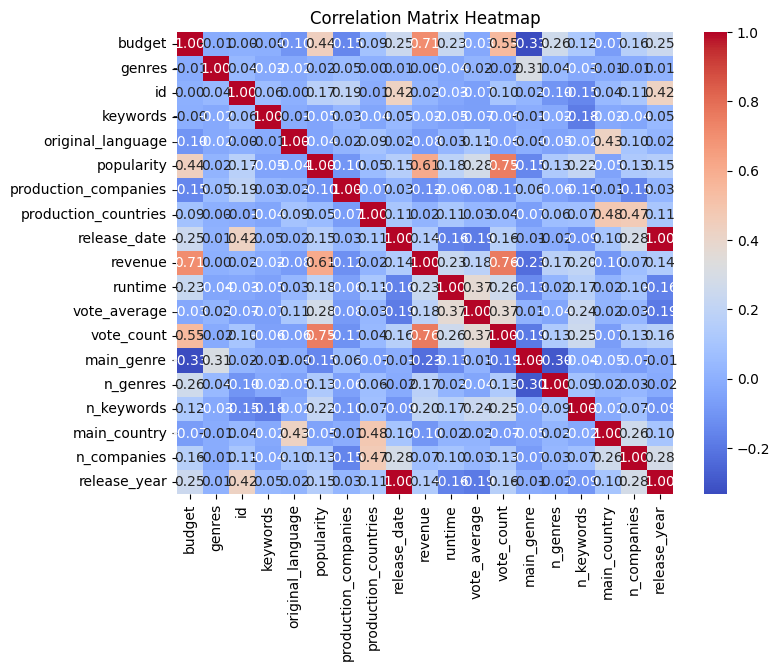

In [ ]:
# Calculate the correlation matrix
correlation_matrix = base_movies.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Creating new column based on revenue and budget
def hit_flop_func(row_entry):
  revenue_pct = (row_entry.revenue/row_entry.budget) * 100 if row_entry.budget > 0 else 0
  if (revenue_pct >= 100): # the movie broke even or made profit
    return 1  # hit
  return 0  # flop

base_movies['hit_flop'] = base_movies.apply(hit_flop_func, axis=1)
print(base_movies[base_movies.hit_flop == 1].count())
base_movies.head() # result will have around 2434 hits

budget                  2434
genres                  2434
id                      2434
keywords                2434
original_language       2434
popularity              2434
production_companies    2434
production_countries    2434
release_date            2434
revenue                 2434
runtime                 2434
vote_average            2434
vote_count              2434
main_genre              2434
n_genres                2434
n_keywords              2434
main_country            2434
n_companies             2434
release_year            2434
hit_flop                2434
dtype: int64


,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,main_genre,n_genres,n_keywords,main_country,n_companies,release_year,hit_flop
0,237000000,28,19995,1463,1,150.437577,289,2,20091210,2787965087,162.0,7.2,11800,1,4,21,1,4,2009,1
1,300000000,12,285,270,1,139.082615,2,1,20070519,961000000,169.0,6.9,4500,2,3,16,1,3,2007,1
2,245000000,28,206647,470,1,107.376788,5,2,20151026,880674609,148.0,6.3,4466,1,3,7,2,3,2015,1
3,250000000,28,49026,849,1,112.312950,923,1,20120716,1084939099,165.0,7.6,9106,1,4,21,1,4,2012,1
4,260000000,28,49529,818,1,43.926995,2,1,20120307,284139100,132.0,6.1,2124,1,3,16,1,1,2012,1


In [ ]:
# Logistic Model

# Splitting
Y = base_movies.hit_flop
X = base_movies.drop('hit_flop', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Parameter hypertuning using GridSearchCV
log_movie = LogisticRegression()
param_grid = {'penalty': ['l2', 'l1'],
              'C': [1, 5, 10],
              'solver': ['liblinear', 'saga']}

log_grid = GridSearchCV(log_movie, param_grid)
log_grid.fit(X_train, Y_train)

print(log_grid.best_params_)
best_movie_log = log_grid.best_estimator_

{'C': 5, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
# Fitting model
best_movie_log.fit(X_train, Y_train)
log_movie_predict = best_movie_log.predict(X_test)

Accuracy: 0.930
Precision: 0.959
Recall: 0.946
F1 Score: 0.953


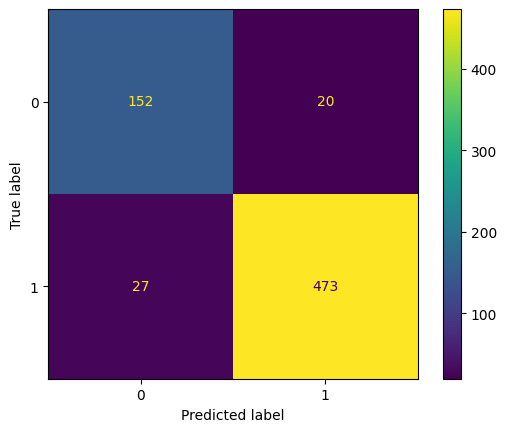

In [ ]:
# Evaluation Metrics
log_acc = metrics.accuracy_score(Y_test, log_movie_predict)
print("Accuracy: %.3f" % log_acc)

log_prec = metrics.precision_score(Y_test, log_movie_predict)
print("Precision: %.3f" % log_prec)

log_rec = metrics.recall_score(Y_test, log_movie_predict)
print("Recall: %.3f" % log_rec)

log_f1 = metrics.f1_score(Y_test, log_movie_predict)
print("F1 Score: %.3f" % log_f1)

log_cm = metrics.confusion_matrix(Y_test, log_movie_predict)
log_disp = ConfusionMatrixDisplay(confusion_matrix = log_cm)
log_disp.plot()
plt.show()

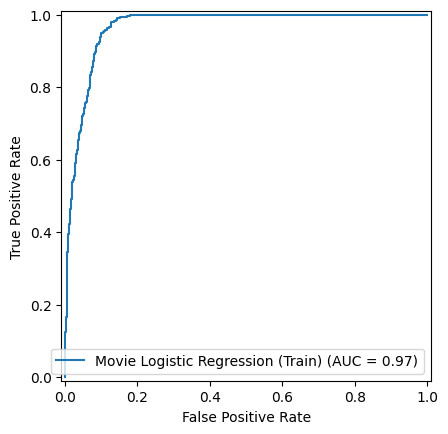

In [ ]:
# ROC Curve and AUC Values (Train)
log_pred_prob = best_movie_log.predict_proba(X_train)[:,1]
log_fpr, log_tpr, log_thresh = metrics.roc_curve(Y_train, log_pred_prob)
log_auc = metrics.auc(log_fpr, log_tpr)
log_roc = metrics.RocCurveDisplay(fpr = log_fpr, tpr = log_tpr, roc_auc = log_auc,
                            estimator_name='Movie Logistic Regression (Train)')
log_roc.plot()
plt.show()

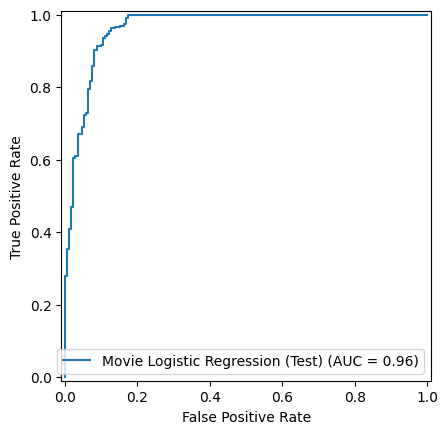

In [ ]:
# ROC Curve and AUC Values (Test)
log_pred_prob = best_movie_log.predict_proba(X_test)[:,1]
log_fpr, log_tpr, log_thresh = metrics.roc_curve(Y_test, log_pred_prob)
log_auc = metrics.auc(log_fpr, log_tpr)
log_roc = metrics.RocCurveDisplay(fpr = log_fpr, tpr = log_tpr, roc_auc = log_auc,
                            estimator_name='Movie Logistic Regression (Test)')
log_roc.plot()
plt.show()